In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mncsal.csv')
df

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [3]:
df=pd.DataFrame(data=df)
df

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [4]:
for col in df.columns.values:
    print("Number of unique values of{} :{} ".format(col,df[col].nunique()))

Number of unique values ofName :457 
Number of unique values ofTeam :30 
Number of unique values ofNumber :53 
Number of unique values ofPosition :5 
Number of unique values ofAge :22 
Number of unique values ofDOJ :18 
Number of unique values ofWeight :87 
Number of unique values ofCollege :118 
Number of unique values ofSalary :309 


In [5]:
df.drop(['Name','College','Team'],axis=1,inplace=True)
df

,Number,Position,Age,DOJ,Weight,Salary
0,0,PG,25,06-Feb,180,7730337.0
1,99,SF,25,06-Jun,235,6796117.0
2,30,SG,27,06-May,205,NaN
3,28,SG,22,06-May,185,1148640.0
4,8,PF,29,06-Oct,231,5000000.0
...,...,...,...,...,...,...
452,41,PF,20,06-Oct,234,2239800.0
453,8,PG,26,06-Mar,203,2433333.0
454,25,PG,24,06-Jan,179,900000.0
455,21,C,26,07-Mar,256,2900000.0


In [6]:
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=['Position','DOJ']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [7]:
df

,Number,Position,Age,DOJ,Weight,Salary
0,0,2,25,4,180,7730337.0
1,99,3,25,7,235,6796117.0
2,30,4,27,9,205,NaN
3,28,4,22,9,185,1148640.0
4,8,1,29,11,231,5000000.0
...,...,...,...,...,...,...
452,41,1,20,11,234,2239800.0
453,8,2,26,8,203,2433333.0
454,25,2,24,5,179,900000.0
455,21,0,26,15,256,2900000.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 6 columns):
Number      457 non-null int64
Position    457 non-null int32
Age         457 non-null int64
DOJ         457 non-null int32
Weight      457 non-null int64
Salary      446 non-null float64
dtypes: float64(1), int32(2), int64(3)
memory usage: 18.0 KB


In [9]:
df.dtypes

Number        int64
Position      int32
Age           int64
DOJ           int32
Weight        int64
Salary      float64
dtype: object

In [10]:
df.describe()

,Number,Position,Age,DOJ,Weight,Salary
count,457.000000,457.00000,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,2.07221,26.938731,8.509847,221.522976,4.842684e+06
std,15.966090,1.40692,4.404016,4.128476,26.368343,5.229238e+06
min,0.000000,0.00000,19.000000,0.000000,161.000000,3.088800e+04
25%,5.000000,1.00000,24.000000,6.000000,200.000000,1.044792e+06
50%,13.000000,2.00000,26.000000,9.000000,220.000000,2.839073e+06
75%,25.000000,3.00000,30.000000,11.000000,240.000000,6.500000e+06
max,99.000000,4.00000,40.000000,17.000000,307.000000,2.500000e+07


In [11]:
df.columns

Index(['Number', 'Position', 'Age', 'DOJ', 'Weight', 'Salary'], dtype='object')

In [12]:
 df.isnull().sum()

Number       0
Position     0
Age          0
DOJ          0
Weight       0
Salary      11
dtype: int64

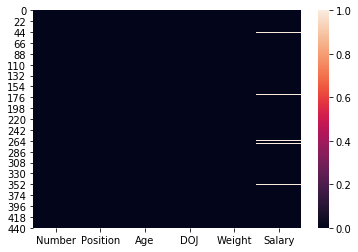

In [13]:
sns.heatmap(df.isnull())

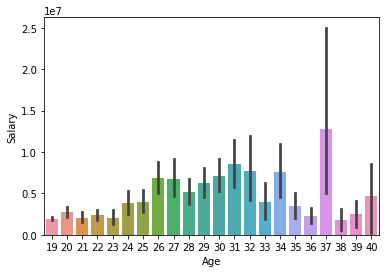

In [14]:
sns.barplot(x='Age',y='Salary',data=df)
plt.show()

In [15]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imp=imputer.fit(df)
df_data=imp.fit_transform(df.values)
print(df_data)
df_final=pd.DataFrame(data=df_data,columns=df.columns)
df_final

[[0.00000000e+00 2.00000000e+00 2.50000000e+01 4.00000000e+00
  1.80000000e+02 7.73033700e+06]
 [9.90000000e+01 3.00000000e+00 2.50000000e+01 7.00000000e+00
  2.35000000e+02 6.79611700e+06]
 [3.00000000e+01 4.00000000e+00 2.70000000e+01 9.00000000e+00
  2.05000000e+02 4.84268411e+06]
 ...
 [2.50000000e+01 2.00000000e+00 2.40000000e+01 5.00000000e+00
  1.79000000e+02 9.00000000e+05]
 [2.10000000e+01 0.00000000e+00 2.60000000e+01 1.50000000e+01
  2.56000000e+02 2.90000000e+06]
 [2.40000000e+01 0.00000000e+00 2.60000000e+01 1.70000000e+01
  2.31000000e+02 9.47276000e+05]]


,Number,Position,Age,DOJ,Weight,Salary
0,0.0,2.0,25.0,4.0,180.0,7.730337e+06
1,99.0,3.0,25.0,7.0,235.0,6.796117e+06
2,30.0,4.0,27.0,9.0,205.0,4.842684e+06
3,28.0,4.0,22.0,9.0,185.0,1.148640e+06
4,8.0,1.0,29.0,11.0,231.0,5.000000e+06
...,...,...,...,...,...,...
452,41.0,1.0,20.0,11.0,234.0,2.239800e+06
453,8.0,2.0,26.0,8.0,203.0,2.433333e+06
454,25.0,2.0,24.0,5.0,179.0,9.000000e+05
455,21.0,0.0,26.0,15.0,256.0,2.900000e+06


In [16]:
df_final.isnull().sum()

Number      0
Position    0
Age         0
DOJ         0
Weight      0
Salary      0
dtype: int64

In [17]:
df_final.skew()

Number      1.668386
Position   -0.014795
Age         0.626349
DOJ         0.192022
Weight      0.113788
Salary      1.595511
dtype: float64

In [18]:
for i in df_final.columns:
    if df_final.skew().loc[i]>0.55:
        df_final[i]=np.log1p(df_final[i])

In [19]:
df_final.skew()

Number     -0.638011
Position   -0.014795
Age         0.284946
DOJ         0.192022
Weight      0.113788
Salary     -0.450091
dtype: float64

Number         AxesSubplot(0.125,0.536818;0.110714x0.343182)
Position    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Age         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
DOJ         AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Weight      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Salary      AxesSubplot(0.789286,0.536818;0.110714x0.343182)
dtype: object

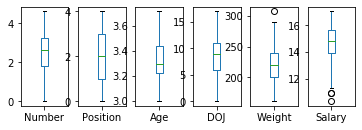

In [20]:
df_final.plot(kind='box',subplots=True,layout=(2,6))

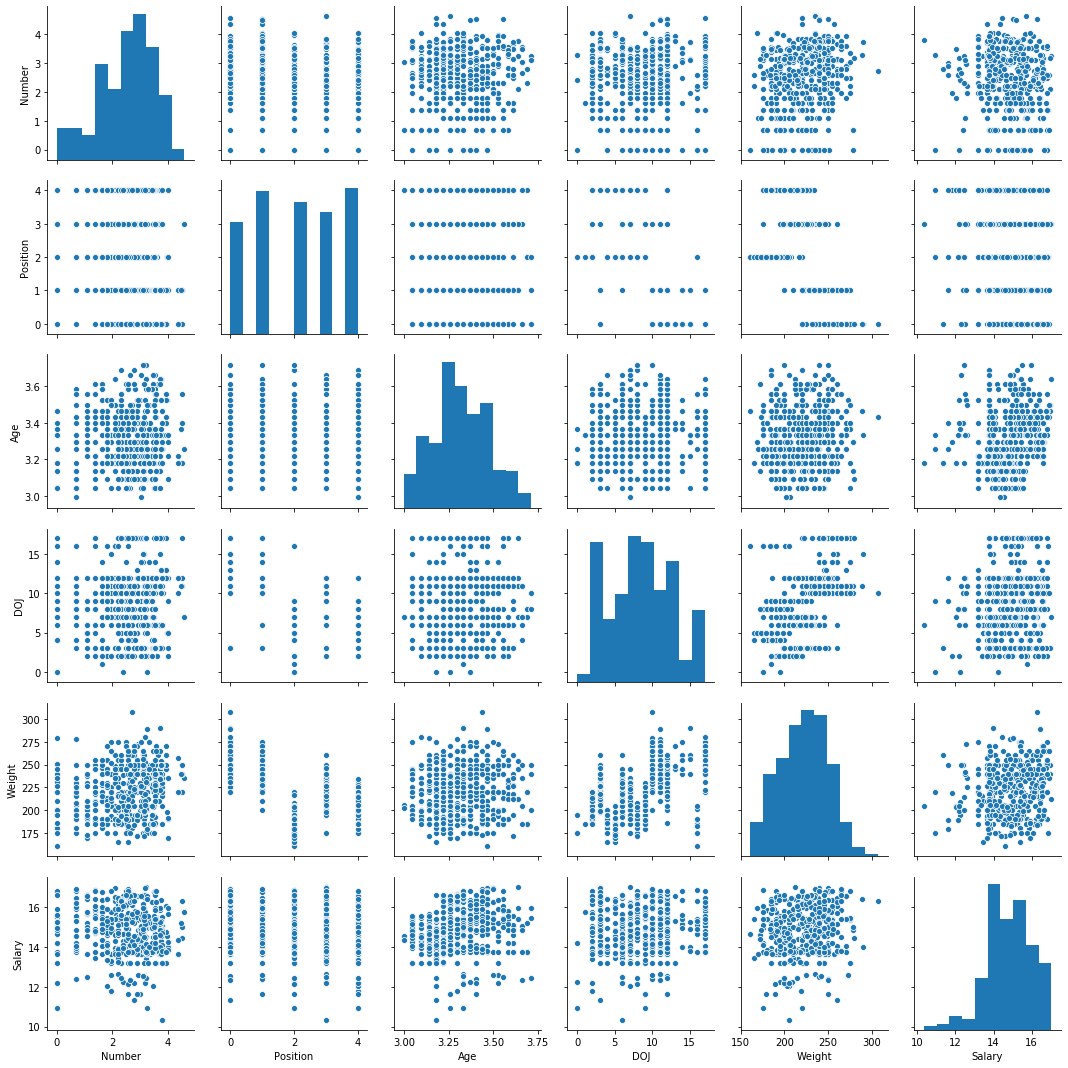

In [21]:
sns.pairplot(df_final)

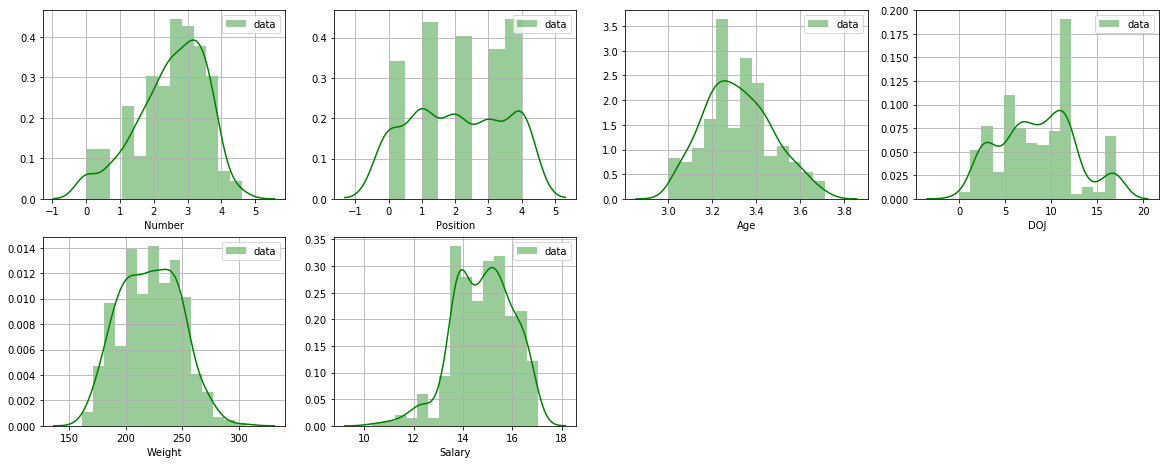

In [22]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_final.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df_final[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

In [23]:
from scipy.stats import zscore
z=np.abs(zscore(df_final))
print(df_final.shape)
df_sal=df_final.loc[(z<3).all(axis=1)]
print(df_sal.shape)

(457, 6)
(453, 6)


(6.0, 0.0)

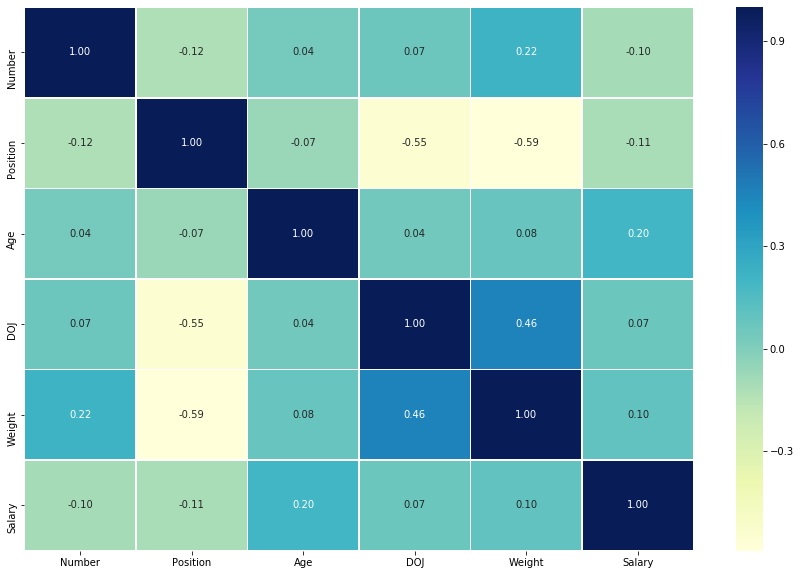

In [24]:
corr_matrix = df_sal.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

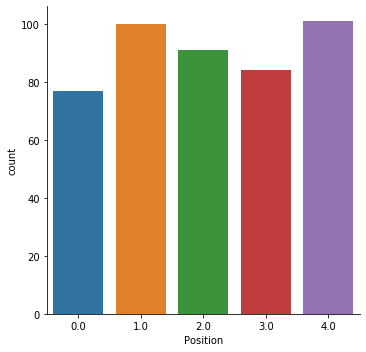

In [25]:
sns.catplot(x='Position',data=df_sal,kind='count')

In [26]:
y=df_sal['Position']
y

0      2.0
1      3.0
2      4.0
3      4.0
4      1.0
      ... 
452    1.0
453    2.0
454    2.0
455    0.0
456    0.0
Name: Position, Length: 453, dtype: float64

In [27]:
x=df_sal.drop('Position',axis=1)
x

,Number,Age,DOJ,Weight,Salary
0,0.000000,3.258097,4.0,180.0,15.860663
1,4.605170,3.258097,7.0,235.0,15.731862
2,3.433987,3.332205,9.0,205.0,15.392980
3,3.367296,3.135494,9.0,185.0,13.954090
4,2.197225,3.401197,11.0,231.0,15.424949
...,...,...,...,...,...
452,3.737670,3.044522,11.0,234.0,14.621898
453,2.197225,3.295837,8.0,203.0,14.704773
454,3.258097,3.218876,5.0,179.0,13.710151
455,3.091042,3.295837,15.0,256.0,14.880222


In [63]:
x.shape

(453, 5)

In [64]:
y.shape

(453,)

In [65]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
    rm=RandomForestClassifier(n_estimators=100)
    rm.fit(x_train,y_train)
    y_predrm=rm.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predrm)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 52 is: 0.72


In [66]:
from sklearn.naive_bayes import GaussianNB

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
         }

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Set random seed
    np.random.seed(45)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [67]:

model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores


{'Logistic Regression': 0.42,
 'KNN': 0.56,
 'Random Forest': 0.58,
 'GaussianNB': 0.54,
 'SVC': 0.57,
 'DecisionTreeClassifier': 0.59}

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
models = {"Random Forest": RandomForestClassifier(n_estimators=100),
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
         }
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_acc_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        y_pred1=model.predict(x_test)
        # Evaluate the model and append its score to model_scores
        model_acc_scores[name] = accuracy_score(y_test,y_pred1)

    return model_acc_scores

In [69]:
model_acc_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test,
                             )

model_acc_scores


{'Random Forest': 0.7032967032967034,
 'Logistic Regression': 0.5494505494505495,
 'KNN': 0.5384615384615384,
 'GaussianNB': 0.7032967032967034,
 'SVC': 0.5714285714285714,
 'DecisionTreeClassifier': 0.5494505494505495,
 'GradientBoostingClassifier': 0.6153846153846154}

In [70]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
    svc=GaussianNB()
    svc.fit(x_train,y_train)
    y_predsvc=svc.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predsvc)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 42 is: 0.71


In [71]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_predknn=knn.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predknn)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 52 is: 0.61


In [72]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    y_preddtc=dtc.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_preddtc)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 52 is: 0.69


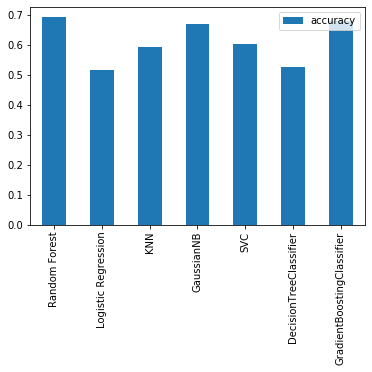

In [62]:
model_compare = pd.DataFrame(model_acc_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [73]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             cv=5,
                             scoring='accuracy')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [74]:
rf=RandomForestClassifier(n_estimators=100,random_state=85)
rf.fit(x_train,y_train)
get_cv_scores(rf)

CV Mean:  0.6202311939268461
STD:  0.014019846916610712




In [75]:
from sklearn.model_selection import GridSearchCV
grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
# Split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=.20)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500, total=   1.1s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.5s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.4s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.2s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samp

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.4s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.2s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.7s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  7.3min finished


In [77]:
gs_y_preds = gs_clf.predict(x_test)

In [78]:
gs_clf.best_params_


{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 2000}

In [79]:
print('Accuracy Score:',accuracy_score(y_test,gs_y_preds))


Accuracy Score: 0.6263736263736264


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=.20)
rf=RandomForestClassifier(n_estimators=2000,criterion='entropy')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rfpred=rf.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,rfpred))
print('Confusion Matrix:',confusion_matrix(y_test,rfpred))
print('Classification Report:',classification_report(y_test,rfpred))

Accuracy Score: 0.7472527472527473
Confusion Matrix: [[14  1  0  0  0]
 [ 4 10  1  3  1]
 [ 0  0 18  0  0]
 [ 1  3  0 12  6]
 [ 0  0  3  0 14]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.74      0.93      0.82        15
         1.0       0.71      0.53      0.61        19
         2.0       0.82      1.00      0.90        18
         3.0       0.80      0.55      0.65        22
         4.0       0.67      0.82      0.74        17

    accuracy                           0.75        91
   macro avg       0.75      0.77      0.74        91
weighted avg       0.75      0.75      0.73        91



In [86]:
from sklearn.ensemble import AdaBoostClassifier
rf=RandomForestClassifier(n_estimators=2000,criterion='entropy')
ad = AdaBoostClassifier(n_estimators=100, base_estimator=rf)
ad.fit(x, y)
ad.score(x_train,y_train)
adpred=ad.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,adpred))
print('Confusion Matrix:',confusion_matrix(y_test,adpred))
print('Classification Report:',classification_report(y_test,adpred))


Accuracy Score: 1.0
Confusion Matrix: [[15  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 17]]
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        19
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        22
         4.0       1.00      1.00      1.00        17

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



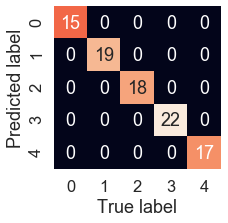

In [87]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, adpred):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, adpred),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, adpred)

In [90]:
from sklearn.externals import joblib
joblib.dump(ad,'salary_pred.pkl')

['salary_pred.pkl']

In [91]:
ad_from_joblib=joblib.load('salary_pred.pkl')
ad_from_joblib.predict(x_test)

array([3., 2., 3., 1., 0., 0., 3., 4., 0., 3., 1., 3., 4., 0., 4., 2., 0.,
       3., 0., 2., 3., 1., 3., 3., 1., 3., 0., 3., 2., 1., 4., 4., 1., 1.,
       2., 2., 1., 4., 1., 1., 1., 0., 4., 2., 2., 4., 2., 2., 3., 3., 0.,
       0., 0., 2., 1., 4., 2., 1., 1., 0., 1., 4., 4., 2., 1., 0., 0., 4.,
       3., 3., 3., 4., 0., 3., 3., 1., 2., 1., 2., 3., 3., 3., 4., 4., 2.,
       4., 2., 3., 2., 4., 1.])